In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
from matplotlib.ticker import MaxNLocator
from csv import reader

In [3]:
import seaborn as sns
sns.set(color_codes=True)

In [4]:
import pandas as pd
import numpy as np

# Part II

### Hypothesis 1 - Distribution of Heating/Hot Water Complaints and Temperature across the days

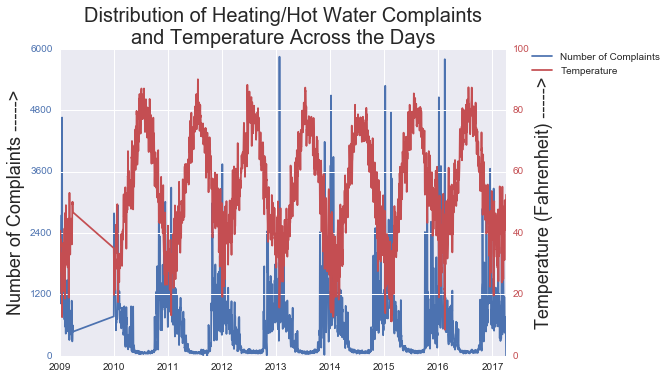

In [5]:
#Distribution of Heating/Hot Water Complaints and Temperature across the days

heating_complaints_temp = pd.read_csv('../res_use_cases/heating_complaints_temp.out', names = ["date", "num_complaints", "temp", "state"])
heating_complaints_temp['date'] = pd.to_datetime(heating_complaints_temp['date'], format='%Y%m%d').dt.date

fig, ax1 = plt.subplots()  

title = ('Distribution of Heating/Hot Water Complaints'
         '\nand Temperature Across the Days')
plt.title(title, fontsize=20)

g1 = ax1.plot(heating_complaints_temp.date, heating_complaints_temp.num_complaints, 'b', label='Number of Complaints')

ax1.set_ylabel('Number of Complaints ----->', fontsize=18)
ax1.set_ylim(0, 6000)
for i in ax1.get_yticklabels():
    i.set_color('b')

ax2 = ax1.twinx()
g2 = ax2.plot(heating_complaints_temp.date, heating_complaints_temp.temp, 'r', label='Temperature')

ax2.set_ylabel('Temperature (Fahrenheit) ----->', fontsize=18)
ax2.set_ylim(0, 100)
for i in ax2.get_yticklabels():
    i.set_color('r')
  
lines = g1 + g2
ax1.legend(lines, [l.get_label() for l in lines], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

ax1.set_yticks(np.linspace(ax1.get_ybound()[0], ax1.get_ybound()[1], 6))
ax2.set_yticks(np.linspace(ax2.get_ybound()[0], ax2.get_ybound()[1], 6))

plt.show()

In [6]:
#Summary of Heating/Hot Water Complaints
heating_complaints_temp_summary = pd.read_csv("../res_use_cases/heating_complaints_temp_summary.out", sep =":",names = ["Statistics", "Value"])
heating_complaints_temp_summary

,Statistics,Value
0,min_num_complaints,0.00
1,quartile_1_num_complaints,86.00
2,median_num_complaints,399.00
3,quartile_3_num_complaints,909.50
4,max_num_complaints,5847.00
5,correlation_score_num_complaints_temp,-0.78


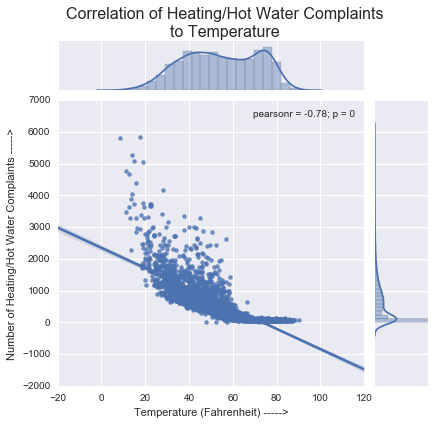

In [7]:
#Correlation plot of Heating/Hot Water Complaints to Temperature
title = ('Correlation of Heating/Hot Water Complaints'
         '\nto Temperature')
g = sns.jointplot(x="temp", y="num_complaints", data=heating_complaints_temp, kind='reg')
g.fig.suptitle(title, fontsize=16)
g.fig.subplots_adjust(top=0.9)
g.ax_joint.set_xlabel("Temperature (Fahrenheit) ----->")
g.ax_joint.set_ylabel("Number of Heating/Hot Water Complaints ----->")

### Hypothesis 2 - Distribution of Noise Complaints and Vehicle Collisions across the days

In [8]:
#Distribution of Noise Complaints and Vehicle Collisions across the days

noise_complaints = pd.read_csv('../res_use_cases/noise_complaint_dist.out', names = ["date", "zip", "num_complaints", "num_vehicle_collisions", "state"])
noise_complaints['date'] = pd.to_datetime(noise_complaints['date'], format='%m/%d/%Y').dt.date


The spatio-temporal plot of the above data is too big to display as a plot.

In [9]:
#Summary of vehicular noise complaints
vehicular_noise_summary = pd.read_csv("../res_use_cases/noise_complaint_dist_summary.out", sep =":",names = ["Statistics", "Value"])
vehicular_noise_summary

,Statistics,Value
0,min_num_complaints,0.00
1,quartile_1_num_complaints,0.00
2,median_num_complaints,0.00
3,quartile_3_num_complaints,0.00
4,max_num_complaints,30.00
5,correlation_score_num_noise_collisions,0.07
6,correlation_score_fringe_num_noise_collisions,0.01


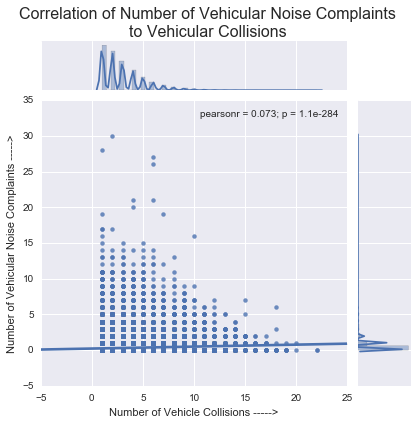

In [10]:
#Correlation plot of Number of Vehicular Noise Complaints to Vehicular Collisions
title = ('Correlation of Number of Vehicular Noise Complaints'
         '\nto Vehicular Collisions')
g = sns.jointplot(x="num_vehicle_collisions", y="num_complaints", data=noise_complaints, kind='reg')
g.fig.suptitle(title, fontsize=16)
g.fig.subplots_adjust(top=0.9)
g.ax_joint.set_xlabel("Number of Vehicle Collisions ----->")
g.ax_joint.set_ylabel("Number of Vehicular Noise Complaints ----->")

### Hypothesis 3 - Distribution of Homeless complaints with Ratio of Median Household Income to Median Rent

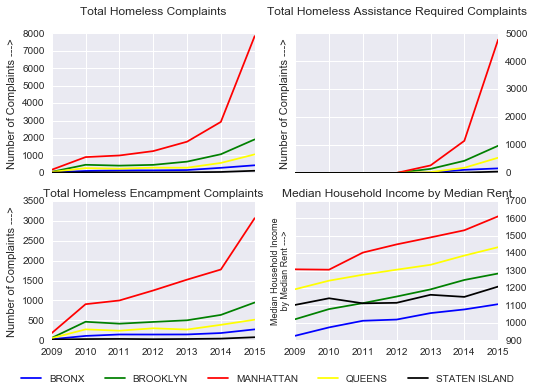

In [11]:
# Distribution of Homeless complaints with Income - Rent Gap
homeless_complaints = pd.read_csv('../res_use_cases/homeless_complaints_combined_with_income_gap.out',  names = ["year", "borough", "num_complaints", "income"])
homeless_complaints['year'] = pd.to_datetime(homeless_complaints['year'], format='%Y').dt.date

assistance_homeless_complaints = pd.read_csv('../res_use_cases/homeless_assistance_complaints_with_income_gap.out',  names = ["year", "borough", "num_complaints", "income"])
assistance_homeless_complaints['year'] = pd.to_datetime(assistance_homeless_complaints['year'], format='%Y').dt.date

homeless_encampment_complaints = pd.read_csv('../res_use_cases/homeless_encampment_complaints_with_income_gap.out',  names = ["year", "borough", "num_complaints", "income"])
homeless_encampment_complaints['year'] = pd.to_datetime(homeless_encampment_complaints['year'], format='%Y').dt.date


fig, ax1 = plt.subplots(2,2)
colors = ['blue','green','red','yellow','black']
color_idx = 0
for label, df in homeless_complaints.groupby('borough'):
    ax1[0,0].plot(df.year, df.num_complaints, label=label, color = colors[color_idx])
    ax1[1,1].plot(df.year, df.income, label=label, color = colors[color_idx])
    color_idx += 1
    
ax1[0, 0].set_title('Total Homeless Complaints', y=1.10)
ax1[0,0].set_ylabel('Number of Complaints --->', fontsize=11)
ax1[1, 1].set_title('Median Household Income by Median Rent', linespacing=3)
ax1[1, 1].set_ylabel('Median Household Income\n by Median Rent --->', fontsize=9)
ax1[1, 1].yaxis.tick_right()
color_idx = 0
for label, df in assistance_homeless_complaints.groupby('borough'):
    ax1[0,1].plot(df.year, df.num_complaints, label=label, color = colors[color_idx])
    color_idx += 1

ax1[0, 1].yaxis.tick_right()
ax1[0, 1].set_title('Total Homeless Assistance Required Complaints', y=1.10)
ax1[0, 1].set_ylabel('Number of Complaints --->', fontsize=11)
 
color_idx = 0    
for label, df in homeless_encampment_complaints.groupby('borough'):
    lines = ax1[1,0].plot(df.year, df.num_complaints, label=label, color = colors[color_idx])
    color_idx += 1
ax1[1, 0].set_title('Total Homeless Encampment Complaints', linespacing =6)
ax1[1, 0].set_ylabel('Number of Complaints --->', fontsize=11)

# Fine-tune figure; hide x ticks for top plots and y ticks for right plots
plt.setp([a.get_xticklabels() for a in ax1[0, :]], visible=False)
#plt.setp([a.get_yticklabels() for a in ax1[:, 1]], visible=False)

# Create custom legend
blue_line = mlines.Line2D([], [], color=colors[0],markersize=15, label='BRONX')
green_line = mlines.Line2D([], [], color=colors[1], markersize=15, label='BROOKLYN')
red_line = mlines.Line2D([], [], color=colors[2], markersize=15, label='MANHATTAN')
yellow_line = mlines.Line2D([], [], color=colors[3], markersize=15, label='QUEENS')
black_line = mlines.Line2D([], [], color=colors[4], markersize=15, label='STATEN ISLAND')

handles = [blue_line,green_line,red_line,yellow_line,black_line]
labels = [h.get_label() for h in handles] 

#fig.legend(handles=handles, labels=labels, loc='lower left')
plt.figlegend( handles, labels, loc = 'lower center', ncol=5, labelspacing=0. )

plt.show()


In [12]:
#Summary of all types of homeless complaints
homeless_complaint_summary = pd.read_csv("../res_use_cases/combined_homeless_complaint_dist_summary.out", sep =":",names = ["Statistics", "Value"])
homeless_complaint_summary

,Statistics,Value
0,min_num_complaints,0.00
1,quartile_1_num_complaints,33.25
2,median_num_complaints,254.50
3,quartile_3_num_complaints,841.00
4,max_num_complaints,42744.00
5,correlation_score_num_homeless_income,0.67


In [13]:
#Summary of homeless encampment complaints
homeless_encampment_summary = pd.read_csv("../res_use_cases/homeless_encampment_complaint_dist_summary.out", sep =":",names = ["Statistics", "Value"])
homeless_encampment_summary

,Statistics,Value
0,min_num_complaints,0.00
1,quartile_1_num_complaints,28.75
2,median_num_complaints,146.50
3,quartile_3_num_complaints,464.00
4,max_num_complaints,3379.00
5,correlation_score_num_homeless_income,0.78


In [14]:
#Summary of homeless assistance complaints
homeless_assistance_summary = pd.read_csv("../res_use_cases/homeless_assistance_complaint_dist_summary.out", sep =":",names = ["Statistics", "Value"])
homeless_assistance_summary

,Statistics,Value
0,min_num_complaints,0.00
1,quartile_1_num_complaints,0.00
2,median_num_complaints,0.00
3,quartile_3_num_complaints,204.75
4,max_num_complaints,39365.00
5,correlation_score_num_homeless_income,0.54


From the above 3 summaries, it can be seen that Homeless Encampment has the highest correlation coefficient with Ratio of Income to Rent

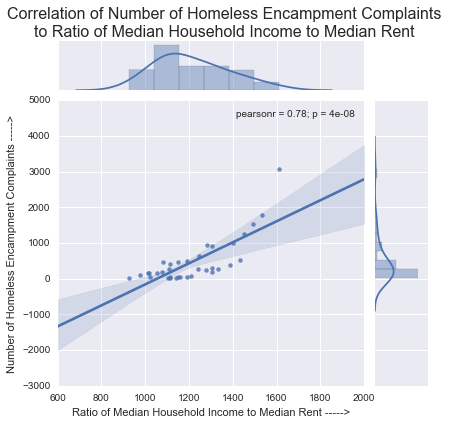

In [15]:
#Correlation plot of Number of Homeless Encampment Complaints to Ratio of Income to Rent
title = ('Correlation of Number of Homeless Encampment Complaints'
         '\nto Ratio of Median Household Income to Median Rent')
g = sns.jointplot(x="income", y="num_complaints", data=homeless_encampment_complaints, kind='reg')
g.fig.suptitle(title, fontsize=16)
g.fig.subplots_adjust(top=0.9)
g.ax_joint.set_xlabel("Ratio of Median Household Income to Median Rent ----->")
g.ax_joint.set_ylabel("Number of Homeless Encampment Complaints ----->")

### Distribution of Number of Complaints Across Time and Day of Week

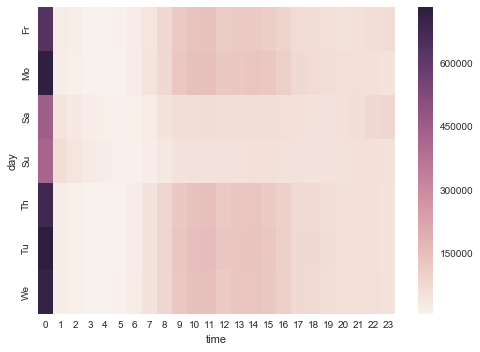

In [16]:
day_time_count = pd.read_csv('../res_use_cases/day_time_dist.out',  names = ["idx", "day", "time", "count"])
day_time_count = day_time_count.drop('idx', 1)
result = day_time_count.pivot(index='day', columns='time', values='count')
sns.heatmap(result)